<a href="https://colab.research.google.com/github/jingam2/AnimalHospital/blob/master/Student_perform_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 출처 : https://www.kaggle.com/datasets/devansodariya/student-performance-data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression   #for 선형회귀 모델
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split    #train, test 데이터셋 분류

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#구글 코랩에서 구글 드라이브 연동시키는 코드
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 만약 Colab Notebooks 폴더 내 data 폴더 밑에 파일을 업로드했다면
# df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/data/student_data.csv')

데이터 확인

In [ ]:
#데이터 불러오기
df = pd.read_csv("/Users/samlee/Desktop/student_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#데이터 결측치 확인
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

데이터 전처리

In [ ]:
#binary 데이터 처리
df = pd.get_dummies(df, columns=["school", "sex", "address", "famsize", "Pstatus",
                                  "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"], dtype=int)
df = df.drop(["school_MS", "sex_F", "address_R", "famsize_LE3", "Pstatus_A", "schoolsup_no", "famsup_no",
              "paid_no", "activities_no", "nursery_no", "higher_no", "internet_no", "romantic_no"], axis=1)

In [ ]:
#object 데이터 처리
df.loc[df["Mjob"] == "teacher", "Mjob"] = 0
df.loc[df["Mjob"] == "health", "Mjob"] = 1
df.loc[df["Mjob"] == "services", "Mjob"] = 2
df.loc[df["Mjob"] == "at_home", "Mjob"] = 3
df.loc[df["Mjob"] == "other", "Mjob"] = 4

df.loc[df["Fjob"] == "teacher", "Fjob"] = 0
df.loc[df["Fjob"] == "health", "Fjob"] = 1
df.loc[df["Fjob"] == "services", "Fjob"] = 2
df.loc[df["Fjob"] == "at_home", "Fjob"] = 3
df.loc[df["Fjob"] == "other", "Fjob"] = 4

df.loc[df["reason"] == "home", "reason"] = 0
df.loc[df["reason"] == "reputation", "reason"] = 1
df.loc[df["reason"] == "course", "reason"] = 2
df.loc[df["reason"] == "other", "reason"] = 3

df.loc[df["guardian"] == "mother", "guardian"] = 0
df.loc[df["guardian"] == "father", "guardian"] = 1
df.loc[df["guardian"] == "other", "guardian"] = 2

#데이터 타입 변경(object to int for vif, OLS)
df["Mjob"] = df["Mjob"].astype("int")
df["Fjob"] = df["Fjob"].astype("int")
df["reason"] = df["reason"].astype("int")
df["guardian"] = df["guardian"].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             395 non-null    int64
 1   Medu            395 non-null    int64
 2   Fedu            395 non-null    int64
 3   Mjob            395 non-null    int64
 4   Fjob            395 non-null    int64
 5   reason          395 non-null    int64
 6   guardian        395 non-null    int64
 7   traveltime      395 non-null    int64
 8   studytime       395 non-null    int64
 9   failures        395 non-null    int64
 10  famrel          395 non-null    int64
 11  freetime        395 non-null    int64
 12  goout           395 non-null    int64
 13  Dalc            395 non-null    int64
 14  Walc            395 non-null    int64
 15  health          395 non-null    int64
 16  absences        395 non-null    int64
 17  G1              395 non-null    int64
 18  G2              395 non-null  

선형회귀 모델 생성

In [ ]:
#예측변수, 반응변수 설정
feature_columns = df.drop(["G3"], axis=1)
X = feature_columns   #예측변수: G3 외 모든 변수
y = df["G3"]    #반응변수: G3

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 학습
linear_reg = LinearRegression()  #선형회귀 사용
linear_reg.fit(X_train, y_train)    #train 데이터 fit

LinearRegression()

모델 평가 지표 만들기

In [ ]:
#교차검증 함수 생성
def cross_val(model_1):
    pred = cross_val_score(model_1, X, y, cv=10)
    return pred.mean()

#모델 평가 지표 출력 함수
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

#모델 평가 지표 계산 함수
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [ ]:
#각 데이터 선형회귀 적용
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

#함수 이용하여 평가 지표 출력
print('Train 데이터 평가 지표:\n')
print_evaluate(y_train, y_train_pred)

print('\nTest 데이터 평가 지표:\n')
print_evaluate(y_test, y_test_pred)

Train 데이터 평가 지표:

MAE: 1.1042772323878058
MSE: 2.787339750489748
RMSE: 1.6695327940743625
R2 Square 0.8552459032966033

Test 데이터 평가 지표:

MAE: 1.588497194577308
MSE: 5.738352027906746
RMSE: 2.3954857603222663
R2 Square 0.7920046520184107


변수 선택(전진 선택, 후진 제거, stepwise)

In [ ]:
#변수 선택법
def processSubset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic  #모델의 AIC
    return {"model" : regr, "AIC" : AIC}

#모든 조합을 중 좋은 모델을 반환시킴
import time
import itertools

def getBest(x, y, k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(["Dalc"]), k):
        combo=(list(combo) + ["Dalc"])

        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x, y, feature_set=combo))  #모델링된 것들을 저장

    models=pd.DataFrame(results) #데이터 프레임으로 변환

    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models["AIC"].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic), "seconds.")
    return  bestModel

print(getBest(x = X_train, y = y_train, k=2))

Processed 465 models on 2 predictors in 0.12145304679870605 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                            1281.956116
Name: 94, dtype: object


In [ ]:
#변수 선택에 따른 학습시간과 저장 K 반복
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X_train, y_train, i)

Processed 31 models on 1 predictors in 0.010957002639770508 seconds.
Processed 465 models on 2 predictors in 0.12937116622924805 seconds.
Processed 4495 models on 3 predictors in 1.249830961227417 seconds.


In [ ]:
#전진 선택법
def forward(x, y, predictors):
    remainingPredictors = [p for p in x.columns.difference(["Dalc"]) if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x = x, y = y, feature_set = predictors + [p] + ["Dalc"]))

    #데이터프레임으로 변환
    models = pd.DataFrame(results)

    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models["AIC"].argmin()] #index
    toc = time.time()

    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in", (toc-tic))
    print("Selected predictors:",bestModel["model"].model.exog_names, "AIC : ", bestModel[0])

    return bestModel

#전진선택법 모델
def forward_model(x, y):
    fModels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()

    #미리 정의된 데이터 변수
    predictors = []

    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(["Dalc"]))+1):
        forwardResult= forward(x, y, predictors)

        if i > 1:
            if forwardResult["AIC"] > fmodelBefore:
                break

        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'Dalc']
    toc = time.time()

    print("Total elapesed time : ", (toc - tic), "seconds.")

    return (fModels["model"][len(fModels["model"])])

forwordBestModel = forward_model(X_train, y_train)

print(forwordBestModel.aic)     #1260.4763001396975
print(forwordBestModel.summary())

Processed  31 models on 1 predictors in 0.010098934173583984
Selected predictors: ['G2', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x177683e50>
Processed  30 models on 2 predictors in 0.008937835693359375
Selected predictors: ['G2', 'age', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x17765a390>
Processed  29 models on 3 predictors in 0.008096933364868164
Selected predictors: ['G2', 'age', 'absences', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x17768d690>
Processed  28 models on 4 predictors in 0.007399082183837891
Selected predictors: ['G2', 'age', 'absences', 'famrel', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x17764b550>
Processed  27 models on 5 predictors in 0.008610725402832031
Selected predictors: ['G2', 'age', 'absences', 'famrel', 'reason', 'Dalc'] AIC :  <statsmodels.regression.linear_model.Regressio

In [ ]:
#후진제거법
def backward(x, y, predictors):
    tic = time.time()
    results=[]

    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(x, y, list(combo)+["Dalc"]))
    models = pd.DataFrame(results)

    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models["AIC"].argmin()]
    toc = time.time()

    print("Processed",models.shape[0], "models on", len(predictors)-1, "predictors in", (toc - tic))
    print("Selected predictors :",bestModel["model"].model.exog_names, "AIC:", bestModel[0])

    return bestModel

def backword_model(x, y):
    BModels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()

    #미리 정의된 데이터 변수
    predictors = x.columns.difference(["Dalc"])
    BmodelBefore = processSubset(x,y,predictors)["AIC"]

    while(len(predictors) > 1):
        backwardResult = backward(X_train, y_train, predictors)

        if backwardResult["AIC"] > BmodelBefore:
            break

        BModels.loc[len(predictors) - 1] = backwardResult
        predictors = BModels.loc[len(predictors) - 1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != "Dalc"]

    toc = time.time()

    print("Total elapsed time :", (toc - tic), "seconds.")

    return (BModels["model"].dropna().iloc[0])

backwardBestModel = backword_model(X_train, y_train)

print(backwardBestModel.aic)        #1283.0729398417998
print(backwardBestModel.summary())

Processed 31 models on 30 predictors in 0.12972688674926758
Selected predictors : ['Fedu', 'Fjob', 'G1', 'G2', 'Medu', 'Mjob', 'Pstatus_T', 'Walc', 'absences', 'activities_yes', 'address_U', 'age', 'failures', 'famrel', 'famsize_GT3', 'famsup_yes', 'freetime', 'guardian', 'health', 'higher_yes', 'internet_yes', 'nursery_yes', 'paid_yes', 'reason', 'romantic_yes', 'school_GP', 'schoolsup_yes', 'sex_M', 'studytime', 'traveltime', 'Dalc'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x177622d90>
Processed 30 models on 29 predictors in 0.07656502723693848
Selected predictors : ['Fedu', 'Fjob', 'G1', 'G2', 'Medu', 'Mjob', 'Walc', 'absences', 'activities_yes', 'address_U', 'age', 'failures', 'famrel', 'famsize_GT3', 'famsup_yes', 'freetime', 'guardian', 'health', 'higher_yes', 'internet_yes', 'nursery_yes', 'paid_yes', 'reason', 'romantic_yes', 'school_GP', 'schoolsup_yes', 'sex_M', 'studytime', 'traveltime', 'Dalc'] AIC: <statsmodels.regression.linear_model.R

In [ ]:
def Stepwise_model(x, y):
    stepModels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x, y, predictors + ["Dalc"])["AIC"]

    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(["Dalc"])) + 1):
        forwardResult = forward(x,y,predictors)

        print("forward")

        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != "Dalc"]
        backwordResult = backward(x,y,predictors)

        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors = stepModels.loc[i]["model"].model.exog_names
            smodelBefore = stepModels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != 'Dalc']
            print("backward")

        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break

        else:
            smodelBefore = stepModels.loc[i]["AIC"]

    toc=time.time()

    print("Total elapsed time : ", (toc - tic), "seconds")

    return (stepModels["model"][len(stepModels["model"])])

stepwiseBestModel = Stepwise_model(X_train, y_train)

print(stepwiseBestModel.aic)    #1260.4763001396975
print(stepwiseBestModel.summary())


Processed  31 models on 1 predictors in 0.013559103012084961
Selected predictors: ['G2', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x177667c90>
forward
Processed 1 models on 0 predictors in 0.0006608963012695312
Selected predictors : ['Dalc'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x177614450>
Processed  30 models on 2 predictors in 0.011343002319335938
Selected predictors: ['G2', 'age', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16170df90>
forward
Processed 2 models on 1 predictors in 0.0009489059448242188
Selected predictors : ['G2', 'Dalc'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1625d0090>
Processed  29 models on 3 predictors in 0.009639978408813477
Selected predictors: ['G2', 'age', 'absences', 'Dalc'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16636c890>
forward
Processed 3 mod

다중공선성 확인(vif)

In [ ]:
#예측변수, 반응변수 변경
feature_columns_1 = df[["G2", "age", "absences", "famrel", "reason", "G1", "activities_yes", "higher_yes", "Walc", "schoolsup_yes", "Dalc"]]
X_1 = feature_columns_1   #예측변수: G3 외 모든 변수
y_1 = df["G3"]    #반응변수: G3

# 데이터 분할
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

# 모델 학습
linear_reg_1 = LinearRegression()  #선형회귀 사용
linear_reg_1.fit(X_train_1, y_train_1)    #train 데이터 fit

LinearRegression()

In [ ]:
#각 데이터 선형회귀 적용
y_train_pred_1 = linear_reg_1.predict(X_train_1)
y_test_pred_1 = linear_reg_1.predict(X_test_1)

#함수 이용하여 평가 지표 출력
print('Train 데이터 평가 지표:\n')
print_evaluate(y_train_1, y_train_pred_1)

print('\nTest 데이터 평가 지표:\n')
print_evaluate(y_test_1, y_test_pred_1)

Train 데이터 평가 지표:

MAE: 1.1012565878815284
MSE: 2.9486151556689713
RMSE: 1.7171532126368256
R2 Square 0.8468704350412208

Test 데이터 평가 지표:

MAE: 1.474331937274366
MSE: 5.390887160147567
RMSE: 2.321828408851
R2 Square 0.8045990477141574


In [ ]:
#표준화 전, vif로 다중공선성 확인
feature_names = X_train_1.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = feature_names
vif

,VIF Factor,features
0,34.256169,G2
1,47.820583,age
2,1.775984,absences
3,20.681010,famrel
4,2.867872,reason
5,46.153603,G1
6,2.133801,activities_yes
7,20.035762,higher_yes
8,7.531081,Walc
9,1.252216,schoolsup_yes


In [ ]:
#표준화 Scaling
pipeline = Pipeline([('std_scalar', StandardScaler())])

a = X_train_1.columns

X_train_1 = pipeline.fit_transform(X_train_1)
X_test_1 = pipeline.transform(X_test_1)

X_1 = pd.DataFrame(X_1, columns=a)
X_train_1 = pd.DataFrame(X_train_1, columns=a)
X_test_1 = pd.DataFrame(X_test_1, columns=a)

In [ ]:
#표준화 후, vif로 다중공선성 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif["features"] = feature_names
vif

,VIF Factor,features
0,3.663815,G2
1,1.256904,age
2,1.099197,absences
3,1.039549,famrel
4,1.075480,reason
5,3.791764,G1
6,1.036594,activities_yes
7,1.127742,higher_yes
8,1.794071,Walc
9,1.195724,schoolsup_yes


이상치 제거(boxplot)

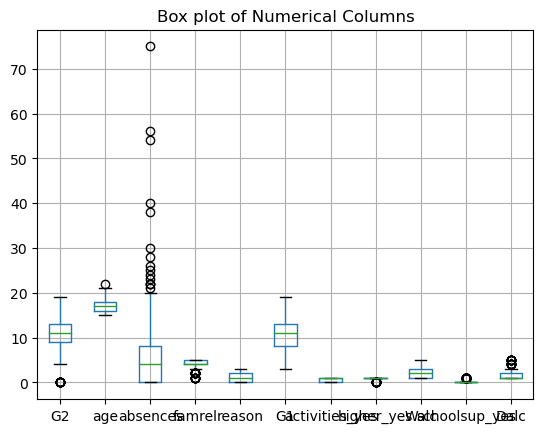

In [ ]:
#box plot 확인
df.boxplot(column=["G2", "age", "absences", "famrel", "reason", "G1", "activities_yes", "higher_yes", "Walc", "schoolsup_yes", "Dalc"])
plt.title('Box plot of Numerical Columns')
plt.show()

In [ ]:
#이상치 제거 함수 생성
def detect_outlier(df, columns):
    q3 = df[columns].quantile(0.75)
    q1 = df[columns].quantile(0.25)
    iqr = q3 - q1

    boundary = 1.5 * iqr

    index_1 = df[df[columns] > q3 + boundary].index
    index_2 = df[df[columns] < q1 - boundary].index

    df[columns] = df[columns].drop(index_1)
    df[columns] = df[columns].drop(index_2)

    return df

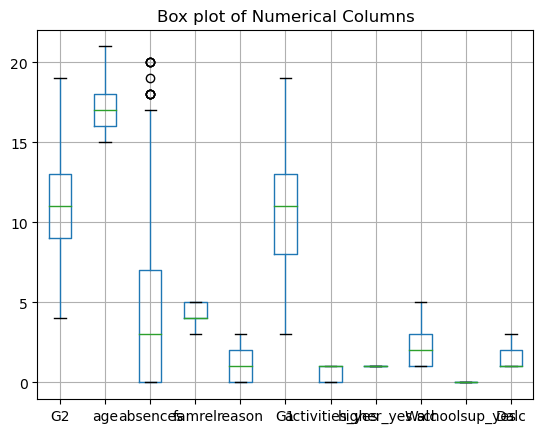

In [ ]:
#이상치 제거
outlier_columns = ["G2", "age", "absences", "famrel", "reason", "G1", "activities_yes", "higher_yes", "Walc", "schoolsup_yes", "Dalc"]

for column in outlier_columns:
    detect_outlier(df, column)

#box plot 확인
df.boxplot(column=["G2", "age", "absences", "famrel", "reason", "G1", "activities_yes", "higher_yes", "Walc", "schoolsup_yes", "Dalc"])
plt.title('Box plot of Numerical Columns')
plt.show()

OLS 회귀분석 결과 & ANOVA

In [ ]:
#OLS 회귀분석 결과 출력
formula = "G3 ~ G2 + age + absences + famrel + activities_yes"
OLS_model = ols(formula, data = df).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     283.2
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          9.00e-118
Time:                        21:44:20   Log-Likelihood:                -685.71
No. Observations:                 340   AIC:                             1383.
Df Residuals:                     334   BIC:                             1406.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3434      1.547     -0.222      0.824      -3.386       2.699
G2                 1.1536      0.032     36.333      0.000       1.091       1.216
age               -0.1984      0.082     -2.413      0.016      -0.360      -0.037
absences           0.1192      0.021      5.756      0.000       0.078       0.160
famrel             0.3384      0.147      2.309      0.022       0.050       0.627
activities_yes    -0.4560      0.201     -2.271      0.024      -0.851      -0.061
==============================================================================
Omnibus:                      162.371   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.206
Skew:                          -2.032   Prob(JB):                    2.31e-170
Kurtosis:                       9.215   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#ANOVA table
lm = ols(formula, data = df).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
G2,1.0,4622.845834,4622.845834,1373.702989,2.185180e-120
age,1.0,5.467325,5.467325,1.624644,2.033314e-01
absences,1.0,103.339280,103.339280,30.707811,6.093243e-08
famrel,1.0,16.355027,16.355027,4.859982,2.816802e-02
activities_yes,1.0,17.351015,17.351015,5.155945,2.380327e-02
Residual,334.0,1123.991518,3.365244,NaN,NaN


In [ ]:
#df_new = pd.concat([X_1, y_1], axis=1)

쿡 거리법으로 이상치 확인 및 제거

In [ ]:
X_cook = sm.add_constant(X_1)
model = sm.OLS(y_1.astype(float), X_cook.astype(float)).fit()
np.set_printoptions(suppress=True)

#instance of influence 생성
influence = model.get_influence()

cooks = influence.cooks_distance

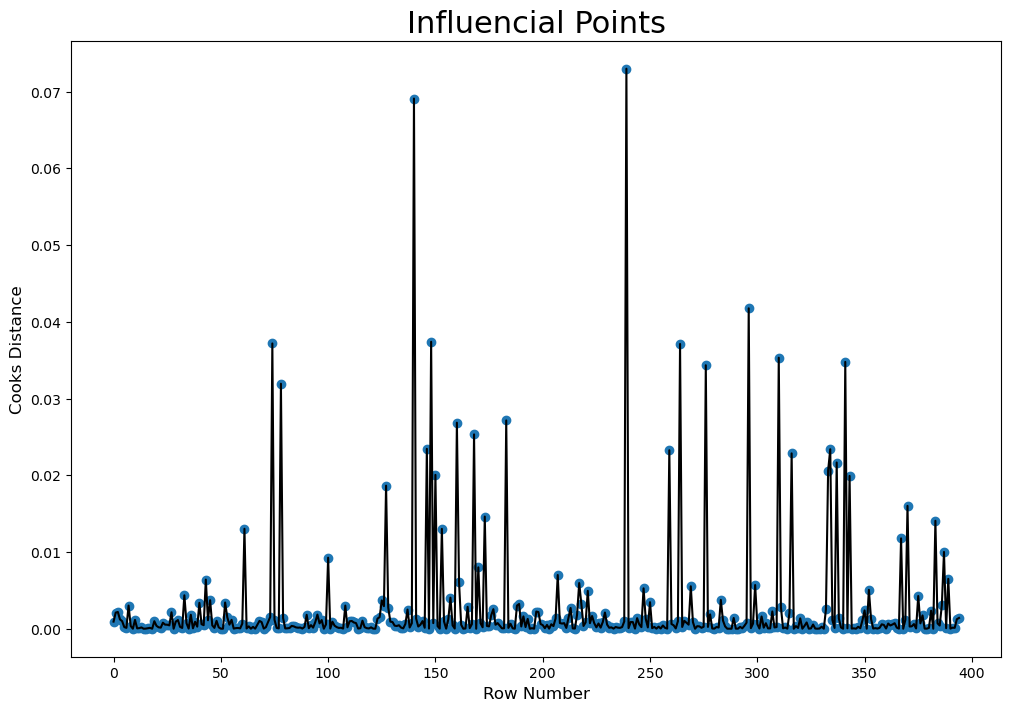

In [ ]:
#영향점 시각화
plt.figure(figsize = (12, 8))
plt.scatter(X_1.index, cooks[0])
plt.plot(X_1.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

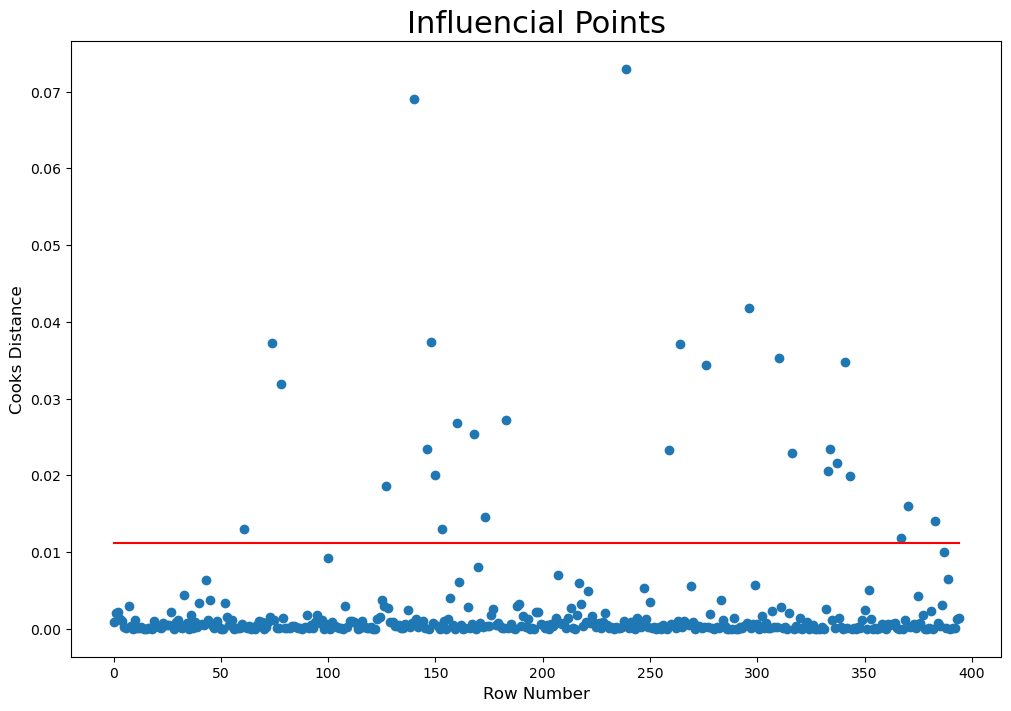

In [ ]:
#쿡 거리법의 평균값으로 이상치 탐지
mean_cooks = np.mean(cooks[0])

mean_cooks_list = [4 * mean_cooks for i in X_1.index]

#평균값 삽입
plt.figure(figsize = (12, 8))
plt.scatter(X_1.index, cooks[0])
plt.plot(X_1.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
#평균을 넘는 이상치 인덱스
influencial_points = df.index[cooks[0] > 4*mean_cooks]
influencial_points

Index([ 61,  74,  78, 127, 140, 146, 148, 150, 153, 160, 168, 173, 183, 239,
       259, 264, 276, 296, 310, 316, 333, 334, 337, 341, 343, 367, 370, 383],
      dtype='int64')

In [ ]:
X_1.iloc[influencial_points, :]

,G2,age,absences,famrel,reason,G1,activities_yes,higher_yes,Walc,schoolsup_yes,Dalc
61,8,16,6,5,2,10,1,1,5,1,5
74,12,16,54,4,0,11,1,1,4,1,2
78,8,17,2,4,0,8,1,0,1,1,1
127,8,19,2,3,2,7,0,0,1,0,1
140,9,15,0,2,2,7,0,1,1,1,1
146,7,15,0,3,0,6,0,1,1,0,1
148,6,16,0,3,2,7,0,0,1,0,2
150,5,18,0,2,2,6,0,0,5,0,2
153,0,19,0,4,0,5,0,0,1,0,1
160,6,17,0,3,2,7,1,0,2,0,2


In [ ]:
#outlier 제거
X_1 = X_1.drop(df.index[influencial_points])

# 인덱스 재설정
X_1 = X_1.reset_index(drop=True)
y_1 = y_1.reset_index(drop=True)

In [ ]:
#OLS 회귀분석 결과 출력
formula = "G3 ~ G2 + age + absences + famrel + activities_yes"
OLS_model = ols(formula, data = df).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     283.2
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          9.00e-118
Time:                        21:46:38   Log-Likelihood:                -685.71
No. Observations:                 340   AIC:                             1383.
Df Residuals:                     334   BIC:                             1406.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3434      1.547     -0.222      0.824      -3.386       2.699
G2                 1.1536      0.032     36.333      0.000       1.091       1.216
age               -0.1984      0.082     -2.413      0.016      -0.360      -0.037
absences           0.1192      0.021      5.756      0.000       0.078       0.160
famrel             0.3384      0.147      2.309      0.022       0.050       0.627
activities_yes    -0.4560      0.201     -2.271      0.024      -0.851      -0.061
==============================================================================
Omnibus:                      162.371   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.206
Skew:                          -2.032   Prob(JB):                    2.31e-170
Kurtosis:                       9.215   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

모델의 정규성, 모델의 선형성, 잔차의 등분산성 검정

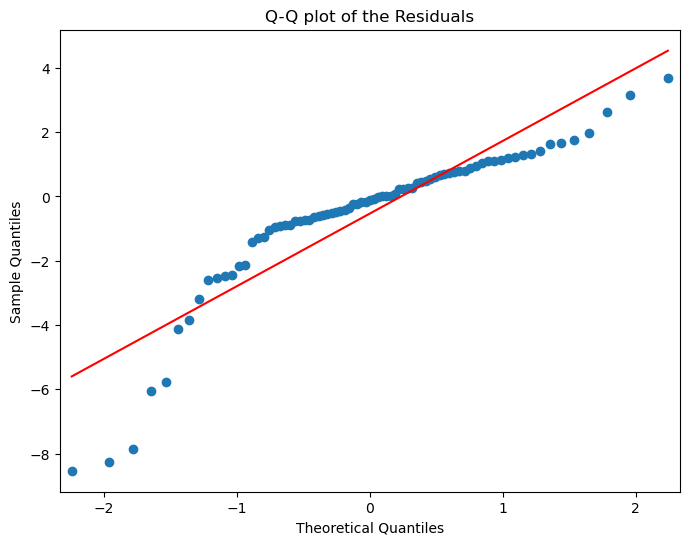

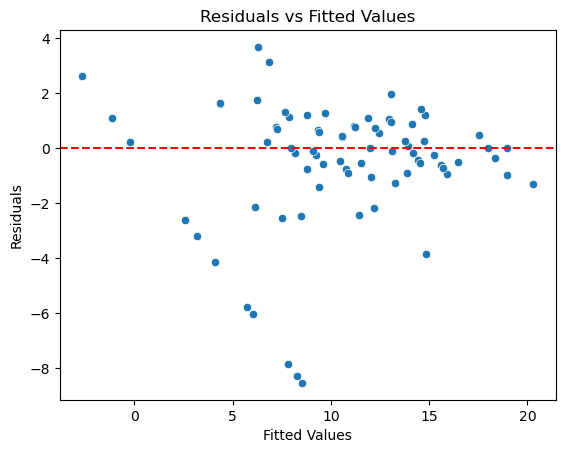

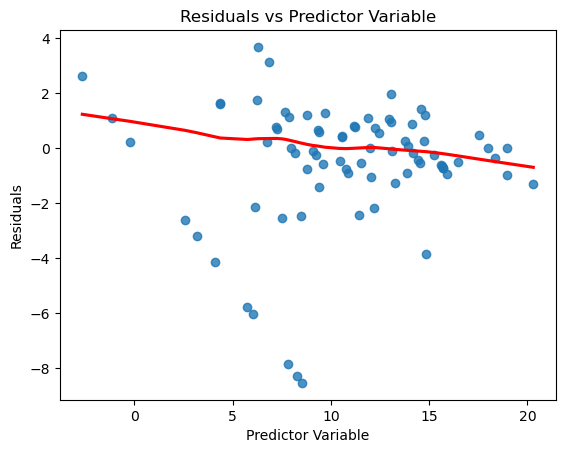

In [ ]:
# 잔차 계산
residuals = y_test - y_test_pred_1

#모델의 정규성 검정(Q-Q plot)
fig = plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=fig.add_subplot(111))
plt.title("Q-Q plot of the Residuals")
plt.show()

#모델의 선형성 검정(residual vs fitted value)
sns.scatterplot(x = y_test_pred_1, y = residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#잔차의 등분산성 검정
sns.regplot(x = y_test_pred_1, y = residuals, lowess = True, line_kws = {"color": "red"})
plt.title("Residuals vs Predictor Variable")
plt.xlabel("Predictor Variable")
plt.ylabel("Residuals")
plt.show()

최종 모델 평가

In [ ]:
score_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test_1, y_test_pred_1), cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
score_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.474332,5.390887,2.321828,0.804599,0.794407


결론

데이터 프레임 변수 설명

school - student's school (binary: 'GP’ or ’MS’)

sex - student's sex (binary: 'F' or 'M')

Age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: no or yes)

famsup - family educational support (binary: no or yes)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: no or yes)

activities - extra-curricular activities  (binary: no or yes)

nursery - attended nursery school (binary: no or yes)

higher - wants to take higher education  (binary: no or yes)

internet - Internet access at home (binary: no or yes)

romantic - with a romantic relationship (binary: no or yes)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)